In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import MetaData, Table, inspect, distinct
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Using SQLAlchemy Core

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
conn = engine.connect()
metadata = MetaData()

# Create all tables from database using MetaData
metadata.create_all(engine)

# Inspect table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Explore first ten rows of Measurement Table
measurment_rows = engine.execute('select * from measurement limit 10')
for row in measurment_rows:
    print (row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [8]:
# reflect the tables
measurement = Table('measurement', metadata, autoload=True, autoload_with=engine)
station = Table('station', metadata, autoload=True, autoload_with=engine)

In [9]:
# inspect column names and data types for 'measurement' table
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
# Inspect column names --> alternative way
print(measurement.c.keys())
print(station.c.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [11]:
measurement_cols = inspector.get_columns('measurement')
for cols in measurement_cols:
    print(cols['name'], cols['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# inspect column names for 'station' table
station_cols = inspector.get_columns('station')
for cols in station_cols:
    print(cols['name'], cols['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Moving on to SQLAlchemy ORM

In [13]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Explore first ten rows of Measurement Table (using Session wrapper object) --> just for practice
limit_10 = session.query(measurement).limit(10)
for row in limit_10:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [18]:
# Get Latest Date
end_date = session.query(measurement.c.date).order_by(measurement.c.date.desc()).first()
print(end_date[0])

2017-08-23


In [19]:
# Calculate the date 1 year ago from the last data point in the database
str_end_date = str(end_date[0])

# Split year, month and day in a list
date_pieces = str_end_date.split('-')

# Change year to include last twelve months of data
start_year = str(int(date_pieces[0]) - 1)

# Create new date string (text format)
start_date = f'{start_year}-{date_pieces[1]}-{date_pieces[2]}'
start_date

'2016-08-23'

In [56]:
# Perform a query to retrieve the data and precipitation scores
prcp_ltm = session.query(measurement.c.date, measurement.c.prcp).\
                filter(measurement.c.date >= start_date).\
                order_by(measurement.c.date.asc()).\
                all()

prcp_ltm

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_ltm).set_index('date')
entries = len(prcp_df)

print(f'There are a total of {entries} rows or data entries')
prcp_df.head()

There are a total of 2230 rows or data entries


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [22]:
# Count number of NaN rows
prcp_nan = prcp_df['prcp'].isna().sum()
prcp_nan

209

In [23]:
# Get rid of NaN
prcp_df_clean = prcp_df.copy()
prcp_df_clean = prcp_df_clean.dropna()

entries_clean = len(prcp_df_clean)

print(f'There are a total of {entries_clean} rows or data entries')
prcp_df_clean.head()

There are a total of 2021 rows or data entries


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_clean.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
fig, ax = plt.subplots()

x = range(len(prcp_df_clean))
ax.boxplot(prcp_df_clean, patch_artist=True)
ax.set_title('Last 12 Months Precipitation Data')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'LTM Daily Precipitation Data in Inches')

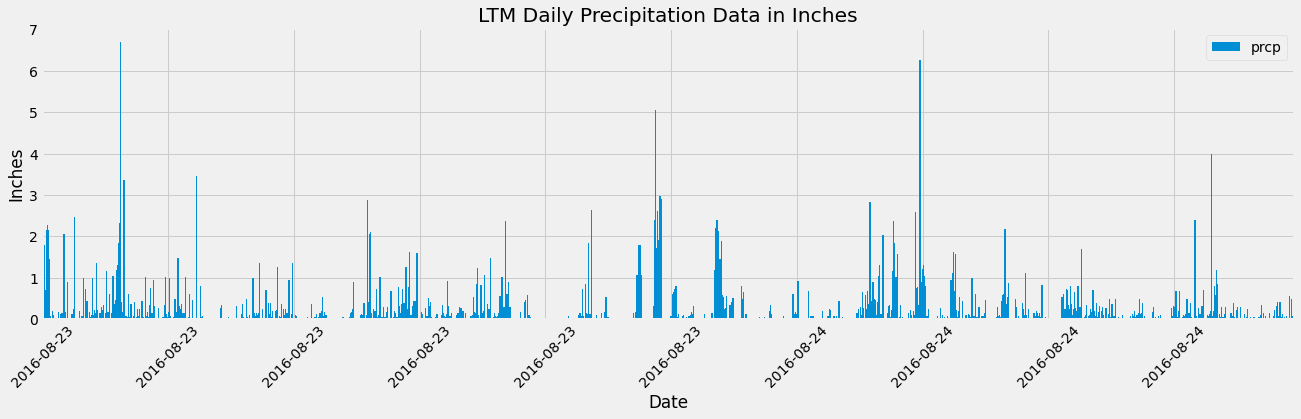

In [48]:
prcp_df_clean.plot(kind='bar', width=2, figsize=(20,5))
plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('LTM Daily Precipitation Data in Inches')

In [49]:
# Design a query to show how many stations are available in this dataset?

# Option 1
station_count = session.query(func.count(Station.station)).all()

# Option 2
station_count_2 = session.query(func.count(distinct(Measurement.station))).all()

print('-----------------')
print(f'There are {station_count[0][0]} stations in the dataset')
print('-----------------')

-----------------
There are 9 stations in the dataset
-----------------


In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).\
                        all()

for station in station_activity:
    print('------------------')
    print(station[0], station[1])

------------------
USC00519281 2772
------------------
USC00519397 2724
------------------
USC00513117 2709
------------------
USC00519523 2669
------------------
USC00516128 2612
------------------
USC00514830 2202
------------------
USC00511918 1979
------------------
USC00517948 1372
------------------
USC00518838 511


In [103]:
station_act = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
            all()
    
top_station = station_act[0][0]

top_station_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == top_station).\
        filter(Measurement.date >= start_date).\
            all()
    
top_station_tobs_dict = dict(top_station_tobs)
#top_station_tobs_dict ={}
#for date, tobs in top_station_tobs:
    #top_station_tobs_dict.setdefault(date, []).append(tobs)
top_station_tobs_dict

{'2016-08-23': 77.0,
 '2016-08-24': 77.0,
 '2016-08-25': 80.0,
 '2016-08-26': 80.0,
 '2016-08-27': 75.0,
 '2016-08-28': 73.0,
 '2016-08-29': 78.0,
 '2016-08-30': 77.0,
 '2016-08-31': 78.0,
 '2016-09-01': 80.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 78.0,
 '2016-09-05': 78.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 80.0,
 '2016-09-09': 79.0,
 '2016-09-10': 77.0,
 '2016-09-11': 80.0,
 '2016-09-12': 76.0,
 '2016-09-13': 79.0,
 '2016-09-14': 75.0,
 '2016-09-15': 79.0,
 '2016-09-16': 78.0,
 '2016-09-17': 79.0,
 '2016-09-18': 78.0,
 '2016-09-19': 78.0,
 '2016-09-20': 76.0,
 '2016-09-21': 74.0,
 '2016-09-22': 77.0,
 '2016-09-23': 78.0,
 '2016-09-24': 79.0,
 '2016-09-25': 79.0,
 '2016-09-26': 77.0,
 '2016-09-27': 80.0,
 '2016-09-28': 78.0,
 '2016-09-29': 78.0,
 '2016-09-30': 78.0,
 '2016-10-01': 77.0,
 '2016-10-02': 79.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 75.0,
 '2016-10-07': 76.0,
 '2016-10-08': 73.0,
 '2016-10-09'

In [145]:
precip = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= start_date).\
                order_by(Measurement.date.asc()).\
                    all()
#drill = dict(precip)
drill = [dict(precip)]
drill

[{'2016-08-23': 0.7,
  '2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': None,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-07': 0.

In [134]:
prcp_dict ={'precipitation_data': dict(precip)}
prcp_dict

{'precipitation_data': {'2016-08-23': 0.7,
  '2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': None,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.

In [119]:
for station in station_act:
    print(station[0])
    top_stations = [station[0] for station in station_act]
    
top_stations

USC00519281
USC00519397
USC00513117
USC00519523
USC00516128
USC00514830
USC00511918
USC00517948
USC00518838


['USC00519281',
 'USC00519397',
 'USC00513117',
 'USC00519523',
 'USC00516128',
 'USC00514830',
 'USC00511918',
 'USC00517948',
 'USC00518838']

In [51]:
# Save top station
top_station = station_activity[0][0]

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

top_station_query = session.query(Measurement.station, func.min(Measurement.tobs),\
                                     func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == top_station).\
                                        all()

print(f'Most active station is {top_station}')
print(f'Lowest temperature recorded was {top_station_query[0][1]}')
print(f'Highest temperature recorded was {top_station_query[0][2]}')
print(f'Average temperature recorded was {top_station_query[0][3]}')

Most active station is USC00519281
Lowest temperature recorded was 54.0
Highest temperature recorded was 85.0
Average temperature recorded was 71.66378066378067


In [52]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

top_station_ltm = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station == top_station).\
                        filter(Measurement.date >= start_date).\
                        all()
top_station_ltm

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [53]:
# Create DataFrame
top_station_df = pd.DataFrame(top_station_ltm).set_index('date')

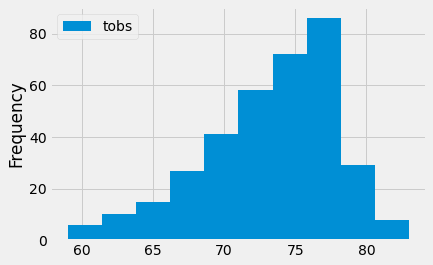

In [54]:
# Plot the results as a histogram
top_station_df.plot(kind='hist')

## Bonus Challenge Assignment

In [55]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [91]:
test = calc_temps('2012-02-28', '2012-03-05')
test = list(test[0])

keys = ['TMIN', 'TAVG', 'TMAX']
dates_temp_dict = zip(keys, temps)
min_max_dict = dict(zip)

[62.0, 69.57142857142857, 74.0]

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
